# Application of the methods learned to the LEGO data set

In [1]:
import numpy as numpy
import pandas as pd

## Import and first inspection

Read in the data set `LEGO.csv` and get an initial overview of the data.
The data set consists of several web scrapes of the LEGO website. When was this and how many sets were recorded in each case?

In the following, we will limit ourselves to the most recent web scrape and look at this partial data set. As we will not only be using it for reading purposes but will also be creating new columns in it, a real copy of the data is suitable. (By default, the data is not copied during row selection).

In [2]:
lego = pd.read_csv("LEGO.csv")
lego.head()

,name,theme,product_code,ageRange,pieceCount,price,minifigureCount,buildHeight,buildWidth,buildDepth,url,date
0,Notre-Dame de Paris,Architecture,21061,18+,4383.0,229.99,NaN,NaN,NaN,NaN,/de-de/product/notre-dame-de-paris-21061,2024-10-12
1,Burg Himeji,Architecture,21060,18+,2125.0,159.99,NaN,NaN,NaN,NaN,/de-de/product/himeji-castle-21060,2024-10-12
2,Cheops-Pyramide,Architecture,21058,18+,1476.0,139.99,NaN,NaN,NaN,NaN,/de-de/product/great-pyramid-of-giza-21058,2024-10-12
3,Freiheitsstatue,Architecture,21042,16+,1685.0,99.99,NaN,NaN,NaN,NaN,/de-de/product/statue-of-liberty-21042,2024-10-12
4,Paris,Architecture,21044,12+,649.0,49.99,NaN,NaN,NaN,NaN,/de-de/product/paris-21044,2024-10-12


## Task 1: Extreme models

- How much does the most expensive current LEGO set cost?
- Which set has the most parts?
- How much money do you have to spend to buy ALL current LEGO sets?
- Which one has the longest name?

In [8]:
# How much does the most expensive current LEGO set cost?
lego["price"].max()


849.99

In [12]:
# Which set has the most parts?
max_piece_name = lego.loc[lego["pieceCount"].idxmax()]
max_piece_name["name"]

'Weltkarte'

In [15]:
numpy.sum(lego["price"])

455307.53

In [20]:
#Which one has the longest name?
longest_name = lego['name'].loc[lego["name"].str.len().idxmax()]
longest_name

'Formula E Panasonic Jaguar Racing GEN2 car & Jaguar I-PACE eTROPHY'

## Task 2: Sets per theme

We want to determine the number of sets per topic group and organize the themes according to this number. The topic sizes should then also be visualized as a bar chart.

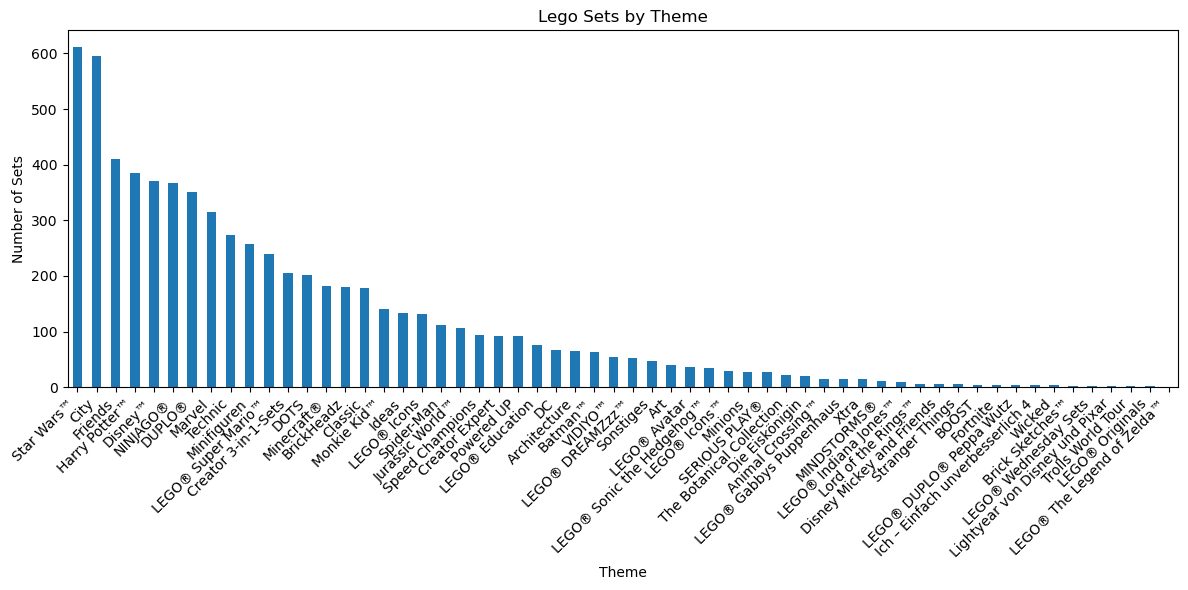

In [23]:
theme_df = lego["theme"].value_counts().reset_index()
theme_df.head()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
lego['theme'].value_counts().plot(kind='bar')
plt.title('Lego Sets by Theme')
plt.xlabel('Theme')
plt.ylabel('Number of Sets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Task 3: For which themes is the price per individual component particularly high?

Determine the price per individual part for each set and calculate the mean value for each theme group. Then visualize your result as a bar chart.

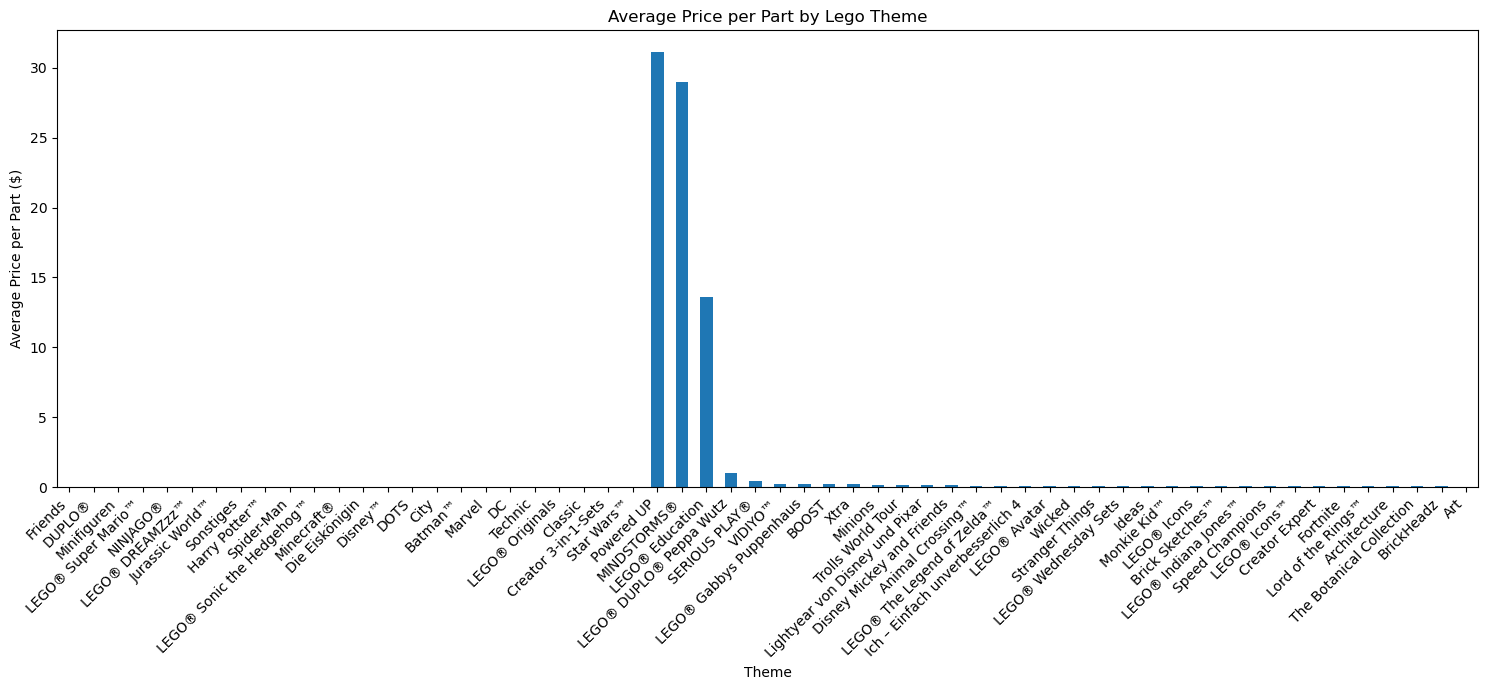

In [26]:
lego["price_per_chart"] = lego["price"] / lego["pieceCount"]
theme_price_per_chart = lego.groupby("theme")["price_per_chart"].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 7))
theme_price_per_chart.plot(kind='bar')
plt.title('Average Price per Part by Lego Theme')
plt.xlabel('Theme')
plt.ylabel('Average Price per Part ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()